# Componentes de una Serie de Tiempo

En este primer módulo del curso vamos a entender qué son y cómo usar las principales herramientas que, al combinarlas, nos permitirán realizar el Análisis Exploratorio de Series de Tiempo para la mayor parte de los problemas que abordemos.

La idea del Análisis Exploratorio es extraer observaciones de la serie que nos permitan encontrar patrones característicos en su comportamiento y que nos permitan además responder a preguntas del negocio.

Y en esta primera lección del curso vamos a ver cuáles son los principales componentes de una Serie de Tiempo (tendencia y estacionalidad) y cómo extraerlos usando la librería "statsmodels".

Así que comencemos primero entendiendo qué son estos componentes, por qué resultan importantes y al final veremos de forma práctica cómo obtenerlos usando diferentes algoritmos implementados en la librería "statsmodels".

## 1. Los componentes de una Serie de Tiempo

En general una Serie de Tiempo convencional se puede modelar como la combinación de 2 componentes principales:

- **La tendencia**, que es el incremento o reducción en los niveles de la Serie a largo plazo.
- **La estacionalidad**, que corresponde a un patrón de máximos y/o mínimos que se repiten **periódicamente, es decir a intervalos regulares de tiempo**.

Entendamos esto con algunos ejemplos:

### Ejemplo 1:

![](componentes-serie-ejm1.png)

En este caso vemos:

- Un patrón estacional que se repite aproximadamente cada año
- Un comportamiento cíclico con mínimos en 1975, 1982, 1991
- Que no hay tendencia en la Serie de Tiempo

### Ejemplo 2:

![](componentes-serie-ejm2.png)

En este caso vemos: 

- Que no hay un patrón estacional
- Que hay una tendencia decreciente
- Que no se observan ciclos aparentes

### Ejemplo 3:

![](componentes-serie-ejm3.png)

En este caso vemos:

- Una tendencia creciente
- Una marcada estacionalidad
- Que no se observan ciclos

### Ejemplo 4:

![](componentes-serie-ejm4.png)

En este caso vemos:

- Que la serie no tiene tendencia
- Ni tampoco estacionalidad
- Ni tampoco ciclos

Este es un ejemplo de una Serie de Tiempo que es difícil de predecir, pues no contiene patrones claros que permitan anticipar su comportamiento a futuro.

Veamos ahora cómo se realiza la detección de los componentes tendencia y estacionalidad.

## 2. Detección de tendencia y estacionalidad con "seasonal_decompose"

La librería "statsmodels" permite descomponer una Serie de Tiempo usando dos métodos: "seasonal_decompose" (el método simple) y "STL" (un método más robusto).

El método "seasonal_decompose" asume que la Serie de Tiempo ($Y(t)$)contiene 3 componentes:

- $T(t)$: tendencia
- $S(t)$: estacionalidad
- $R(t)$: residual (o ruido) correspondiente a un componente que no podemos predecir y que es intrínseco a la Serie de Tiempo

Y estos componentes se calculan siguiendo estos pasos:

### 2.1. Definir el tipo de modelo: aditivo o multiplicativo

- En el modelo aditivo supondremos que:

$$Y(t) = T(t) + S(t) + R(t)$$

- Mientras que en el modelo multiplicativo supondremos que:

$$Y(t) = T(t) \cdot S(t) \cdot R(t)$$

### 2.2. Estimación de la tendencia ($T(t)$)

Esta estimación se hace simplemente con un algoritmo de media móvil (lección 14 curso "Pandas Nivel Avanzado": Ventanas móviles sobre series temporales):

![](media-movil-tendencia.png)

De esta forma:

$$T(t) = \text{media_móvil}(Y(t))$$

### 2.3. Estimación del componente estacional ($S(t)$)

En este caso la estimación dependerá de si se usa un modelo aditivo o multiplicativo:


- Si el modelo es aditivo, $T(t)$ se resta de $Y(t)$:

$$S(t) = Y(t) - T(t)$$

- Si el modelo es multiplicativo, se divide $Y(t)$ entre $T(t)$:

$$S(t) = \frac{Y(t)}{T(t)}$$

### 2.4. Estimación del componente residual ($R(t)$)

Como cada serie tendrá sus características particulares, generalmente $T(t)$ y $S(t)$ no serán los únicos componentes presentes. Este componente que no se puede predecir (propio de la Serie) es precisamente el residual.

La estimación de este residual también depende del tipo de modelo que estemos asumiendo:

- Si el modelo es aditivo, $R(t)$ será el resultado de restar $T(t)$ y $S(t)$ de la serie de tiempo original:

$$R(t) = Y(t) - T(t) - S(t)$$

- Si el modelo es multiplicativo, $R(t)$ será el resultado de dividir la serie de tiempo original entre la multiplicación de $T(t)$ y $S(t)$:

$$R(t) = \frac{Y(t)}{S(t) \cdot T(t)}$$

El residual es un término muy importante porque nos permitirá determinar cuál modelo (aditivo o multiplicativo) es el más adecuado al momento de la descomposición:

> Entre más "grande" sea el residual peor será la descomposición usada

## 3. Ejemplo práctico de descomposición con "seasonal_decompose"

Teniendo claro cómo funciona el método ya estamos listos para usarlo.

Comencemos leyendo dos Series de Tiempo:

- *co2.csv*: registro histórico de niveles de CO2 en una ubicación geográfica en particular
- *pasajeros.csv*: registro histórico del número de pasajeros transportados por una aerolínea

Comencemos leyendo y visualizando cada set de datos y haciendo un Análisis Exploratorio básico:

              co2
fecha            
1958-03-29  316.1
1958-04-05  317.3
1958-04-12  317.6
1958-04-19  317.5
1958-04-26  316.4


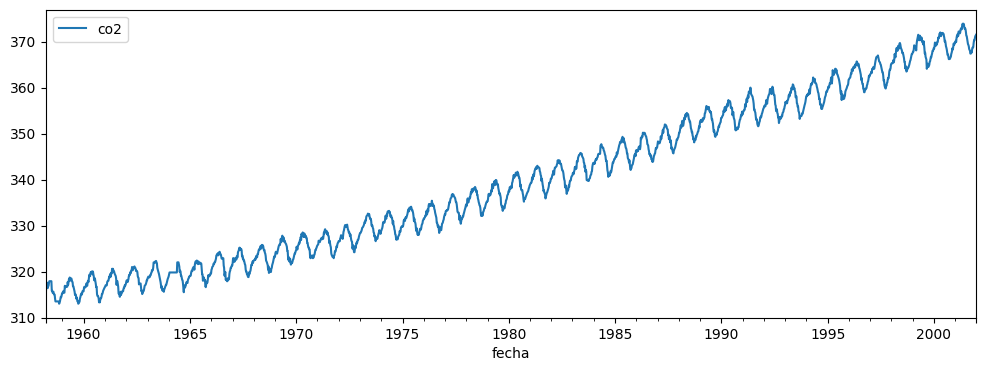

In [1]:
# Leer dataset co2
import pandas as pd

RUTA = './'
co2_df = pd.read_csv(RUTA + 'co2.csv', 
                     parse_dates=['fecha'],
                     index_col='fecha'
                    )

# Imprimir encabezado
print(co2_df.head())

# Graficar
co2_df.plot(figsize=(12,4));

Algunas observaciones importantes:

- La Serie de Tiempo tiene una frecuencia semanal
- Al graficarla se observa una tendencia creciente y una estacionalidad (con periodicidad anual)

Veamos ahora la serie *pasajeros.csv*:

            nro
fecha          
1949-01-31  112
1949-02-28  118
1949-03-31  132
1949-04-30  129
1949-05-31  121


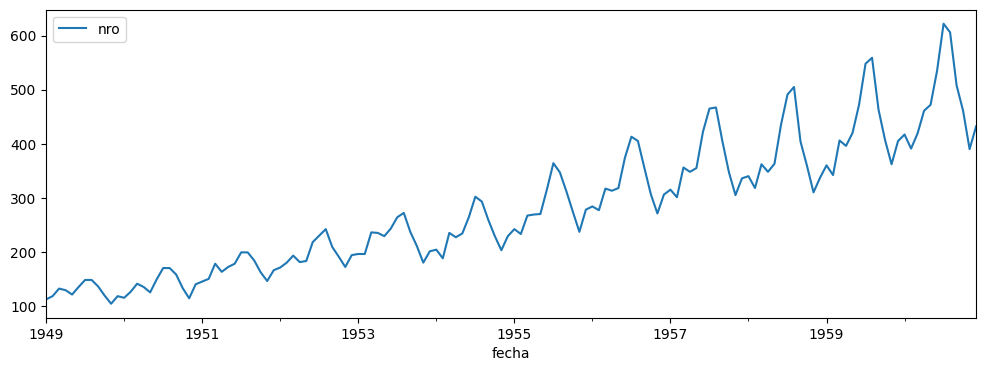

In [2]:
pasaj_df = pd.read_csv(RUTA + 'pasajeros.csv',
                       parse_dates=['fecha'],
                       index_col='fecha'
                      )

# Imprimir encabezado
print(pasaj_df.head())

# Graficar
pasaj_df.plot(figsize=(12,4));

En este caso podemos observar que:

- La serie tiene una frecuencia mensual
- Y tiene además una tendencia creciente y una estacionalidad (con periodicidad aproximadamente anual)

Bien, hemos visto que las dos series tienen tanto tendencia como estacionalidad, así que la idea es realizar la descomposición usando  "seasonal_decompose". Esto requiere sólo una línea de código:

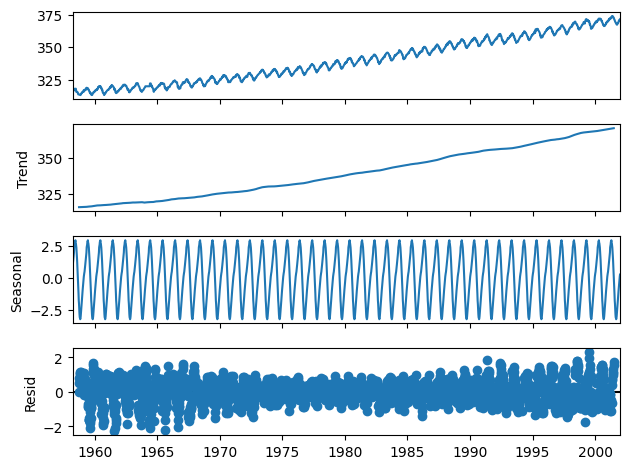

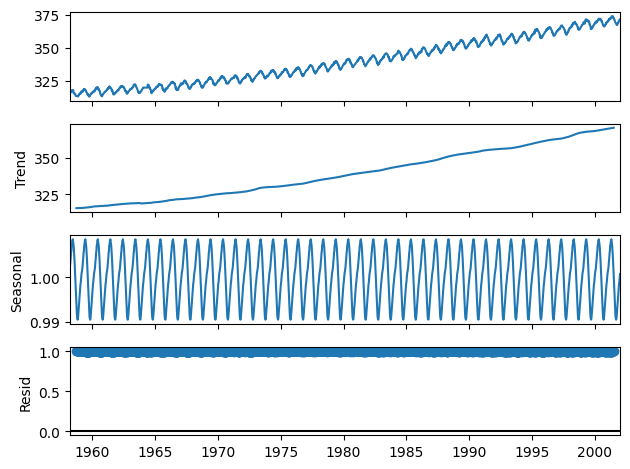

In [2]:
# Descomposición de CO2:

# Instalar statsmodels
#!pip install statsmodels

# Importar "seasonal_decompose"
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Descomposiciones aditiva y multiplicativa
co2_dec_add = seasonal_decompose(co2_df,model='additive')
co2_dec_mul = seasonal_decompose(co2_df,model='multiplicative')

# Generar gráficos
co2_dec_add.plot();
co2_dec_mul.plot();

Vemos que las descomposiciones son muy similares, aunque en el caso de los componentes estacional y residual las magnitudes son diferentes.

Para determinar cuál de las dos descomposiciones es más adecuada podemos buscar aquella con el menor residual promedio:

In [4]:
# Comparar residuales
print(f'Residual desc. aditiva: {co2_dec_add.resid.mean():.4f}')
print(f'Residual desc. multip.: {co2_dec_mul.resid.mean():.4f}')

Residual desc. aditiva: 0.0039
Residual desc. multip.: 1.0000


Y podemos confirmar que en este caso la descomposición aditiva representa mejor los componentes de la Serie de Tiempo.

Repitamos lo anterior para el caso de la serie de tiempo de pasajeros:

Residual desc. aditiva: -0.7513
Residual desc. multip.: 0.9982


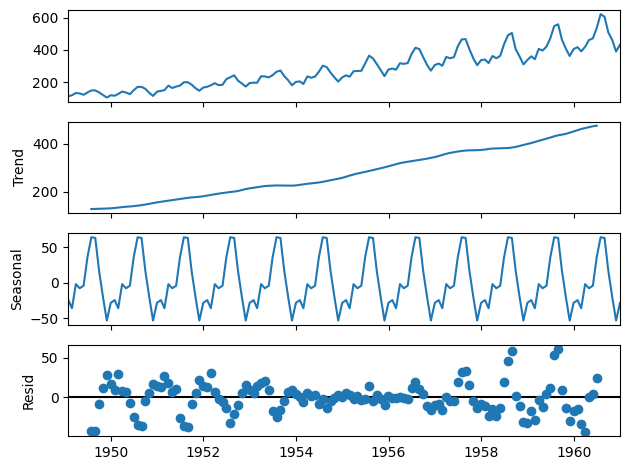

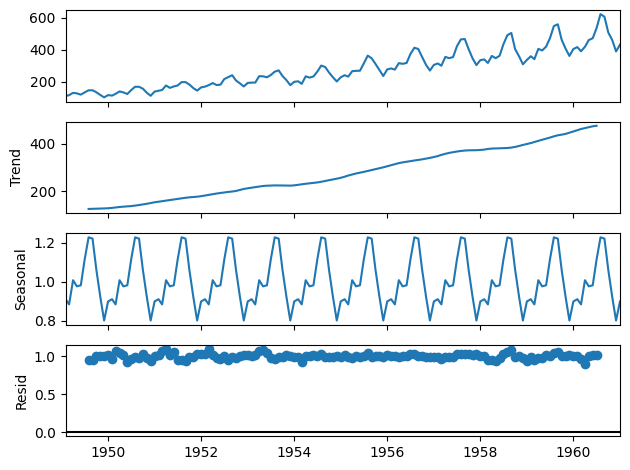

In [5]:
# Descomposiciones básicas pasajeros
pas_dec_add = seasonal_decompose(pasaj_df,model='additive')
pas_dec_mul = seasonal_decompose(pasaj_df,model='multiplicative')

# Gráficas
pas_dec_add.plot();
pas_dec_mul.plot();

# Comparar residuales
print(f'Residual desc. aditiva: {pas_dec_add.resid.mean():.4f}')
print(f'Residual desc. multip.: {pas_dec_mul.resid.mean():.4f}')

Y en este caso observamos que la descomposición más adecuada es nuevamente la aditiva.

## 4. Detección de tendencia y estacionalidad con el método STL

El método STL (“Seasonal and Trend decomposition using Loess”) también está implementado en "statsmodels" y permite calcular los 3 componentes de interés.

Este método consta de tres pasos:

### 4.1. Estimación de la estacionalidad ($S(t)$)

Se obtiene usando un método llamado regresión local ("local regression" o "Loess"). Asumiendo una periodicidad "N" se promedian "N" datos vecinos:

$$S(t) = \text{Loess}(Y(t))$$

### 4.2. Estimación de la tendencia ($T(t)$)

El componente estacional calculado anteriormente se resta de la serie original y con ello se tiene una estimación de la tendencia y el residual combinados:

$$T(t) + R(t) = Y(t) - S(t)$$

A esta serie resultante ($T(t) + R(t)$) se le aplica nuevamente la regresión "Loess" con un "N" mayor que el usado para la estacionalidad, con lo cual se tiene una estimación de la tendencia:

$$T(t) = \text{Loess}(Y(t)-S(t))$$

### 4.3. Estimación del residual ($R(t)$)

Finalmente, el residual se estima simplemente restando la tendencia ($T(t)$, paso 4.2) y la estacionalidad ($S(t)$), paso 4.1) de la serie original:

$$R(t) = Y(t) - S(t) - T(t)$$

## 5. Ejemplo práctico de descomposición usando el método STL

Veamos cómo aplicar este método a las dos Series de Tiempo anteriores. En este caso usaremos nuevamente "statsmodels" y es importante tener en cuenta que el parámetro "N" para el cálculo del componente estacional se denomina "seasonal" y debe ser un número impar (debido a la implementación que usa "statsmodels").

Para la Serie de Tiempo CO2 tendríamos:

Residual desc. aditiva: 0.0039
Residual desc. multip.: 1.0000
Residual desc. STL:     -0.0009


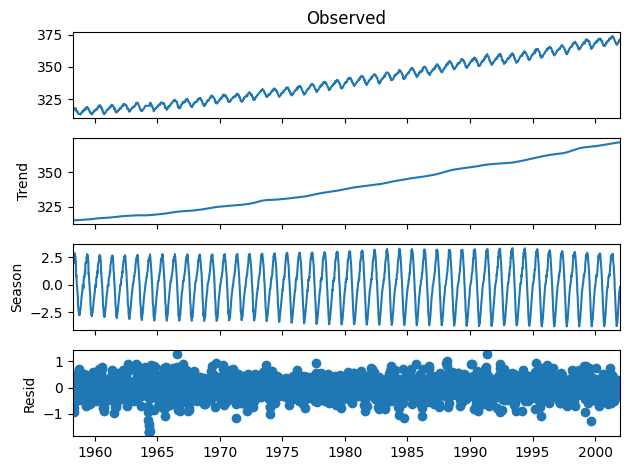

In [6]:
from statsmodels.tsa.seasonal import STL

# Descomposición STL CO2
co2_stl = STL(
    co2_df,
    seasonal = 13).fit()

# Graficar
co2_stl.plot();

# Y comparar con los residuales de las descomposiciones anteriores
print(f'Residual desc. aditiva: {co2_dec_add.resid.mean():.4f}')
print(f'Residual desc. multip.: {co2_dec_mul.resid.mean():.4f}')
print(f'Residual desc. STL:     {co2_stl.resid.mean():.4f}')

Y vemos que esta descomposición resulta siendo mucho mejor (es decir, su residual es menor) comparado con los métodos clásicos.

Veamos qué sucede con la Serie de Tiempo de pasajeros:

Residual desc. aditiva: -0.7513
Residual desc. multip.: 0.9982
Residual desc. STL:     -0.1212


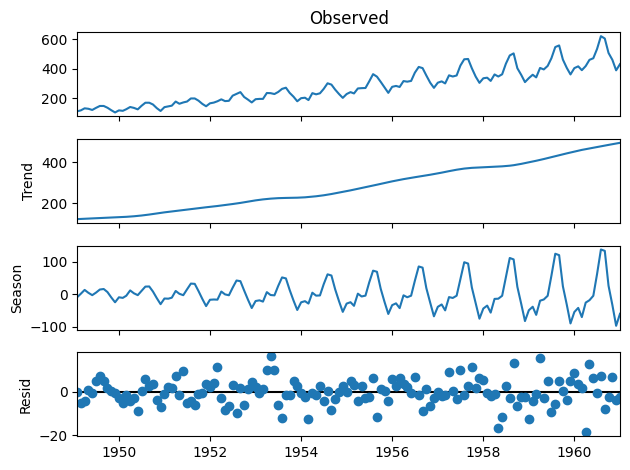

In [7]:
# Descomposición STL pasajeros
pas_stl = STL(
    pasaj_df,
    seasonal = 13).fit()

# Graficar
pas_stl.plot();

# Comparar residuales
print(f'Residual desc. aditiva: {pas_dec_add.resid.mean():.4f}')
print(f'Residual desc. multip.: {pas_dec_mul.resid.mean():.4f}')
print(f'Residual desc. STL:     {pas_stl.resid.mean():.4f}')

Y en este caso también tenemos una mejor descomposición usando el método STL.

Es importante tener en cuenta que este método además captura un componente estacional donde la diferencia entre máximos y mínimos no es constante sino que se incrementa a medida que pasa el tiempo.

Es decir que esta descomposición STL captura mucho mejor estas variaciones en los diferentes componentes de la Serie.

## 6. Aspectos a tener en cuenta

- La tendencia nos indica el incremento/reducción en los valores de la serie a largo plazo, mientras que la estacionalidad indica si la serie tiene patrones (máximos y mínimos) que se repiten periódicamente.
- Podemos extraer estos componentes usando la librería "statsmodels" y el método clásico ("seasonal_decompose") o el método STL (que es más robusto).
- En últimas la mejor descomposición se determina a partir del valor promedio de los residuales: entre más pequeño sea este valor mejor será la descomposición.